In [ ]:
!pip install pmdarima

In [4]:
import pandas as pd
import numpy as np
from datetime import datetime
import json
from pmdarima import auto_arima
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("/content/drive/MyDrive/Universidad/Evapotranspiration-Prediction-2022/data_processing/data/Eto-Rinconada.csv",index_col='Data')
data = data['Eto']
data.index = pd.to_datetime(data.index,format="%d-%m-%Y")
data = data.interpolate()

In [6]:
train = data[:-365]
test = data[-365:]

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

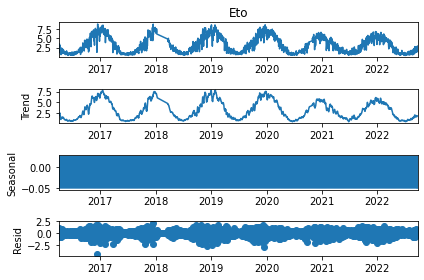

In [11]:
result = seasonal_decompose(data,model='add')
result.plot();

In [18]:
auto_arima(data).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2367
Model:               SARIMAX(0, 1, 3)   Log Likelihood               -2393.339
Date:                Sat, 08 Oct 2022   AIC                           4794.678
Time:                        09:06:01   BIC                           4817.753
Sample:                    04-01-2016   HQIC                          4803.079
                         - 09-23-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4354      0.014    -30.779      0.000      -0.463      -0.408
ma.L2         -0.2393      0.018    -13.643      0.000      -0.274      -0.205
ma.L3         -0.0458      0.017     -2.675      0.007      -0.079      -0.012
sigma2         0.4426      0.008     54.646      0.000       0.427       0.458
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1076.19
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.61
Prob(H) (two-sided):                  0.03   Kurtosis:                         6.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
from statsmodels.tsa.statespace.tools import diff

In [16]:
data

Data
2016-04-01    2.09
2016-04-02    2.04
2016-04-03    1.42
2016-04-04    2.84
2016-04-05    1.42
              ... 
2022-09-19    1.88
2022-09-20    1.50
2022-09-21    2.39
2022-09-22    2.95
2022-09-23    2.29
Name: Eto, Length: 2367, dtype: float64

In [17]:
df = pd.DataFrame(data)
df['Diff_1'] = diff(df['Eto'],k_diff=1)

In [ ]:
adf_test

In [ ]:
value = '{"Temperatura": null, "Humedad": 40}'
# value = value[2:]

In [ ]:
json.loads(value)

{'Temperatura': None, 'Humedad': 40}

In [ ]:
print(value)

{"Temperatura": 23, "Humedad": 40}


In [ ]:
df = pd.Series(data=value)

In [ ]:
df


0    {"Temperatura": 23, "Humedad": 40}
dtype: object

In [ ]:
now = datetime.now()
hour = now.hour
minutes = now.minute
seconds = now.second

In [ ]:
t = []
ini = 1451642400
final = datetime.now().timestamp()
cont = 0
ini_new = 0
while (ini <= final):
  t.append(ini)
  ini = ini + 7200
  cont= cont+1
  if cont%7==0:
    ini = ini+(36000)
  # if cont==3000:
  #   break


In [ ]:
time_df = pd.DataFrame({'Timestamp':t})
time_df.to_csv('/content/drive/MyDrive/Universidad/Evapotranspiration-Prediction-2022/data_processing/data/Timestamp.csv')

In [ ]:
len(t)

14764

In [ ]:
dt = []
for i in range(len(t)):
  dt.append(datetime.fromtimestamp(t[i]))

1664214188.854899

In [ ]:
pd.to_datetime(dt[0])

Timestamp('2016-01-01 10:00:00')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Universidad/Evapotranspiration-Prediction-2022/data_processing/data/Eto-Rinconada.csv',index_col='Data')
df.index = pd.to_datetime(df.index,format='%d-%m-%Y')
df = df.interpolate()

In [ ]:
eto_array = df['Eto'].values
eto_array = np.insert(eto_array,len(eto_array),3.4) # Agregar valor al final (3.4)
eto_array = np.delete(eto_array,0) # Eliminar primer valor
df_ = pd.DataFrame({'Eto':eto_array})
df_ = df_['Eto']

In [ ]:
df['Eto'].values

array([1.8 , 2.4 , 2.5 , ..., 4.26, 2.04, 2.2 ])

In [ ]:
eto_array

array([2.4 , 2.5 , 2.7 , ..., 2.04, 2.2 , 3.4 ])

In [ ]:
df_.values

array([2.4 , 2.5 , 2.7 , ..., 2.04, 2.2 , 3.4 ])